This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [72]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))#shape:(2,1)是2數列，每一列有1個資料，tf.ones陣列裡的資料都是1
print(x)


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [73]:
x = tf.zeros(shape=(2, 1))
print(x)


tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [74]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)# mean=0.:平均值為0， stddev=1.:標準差為1，tf.random.normal:正態分布
print(x)

tf.Tensor(
[[-0.2771051 ]
 [ 0.91248834]
 [ 0.41885972]], shape=(3, 1), dtype=float32)


In [75]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)#tf.random.uniform:隨機變數，minval=0., maxval=1.:數字在0~1之間
print(x)

tf.Tensor(
[[0.25362098]
 [0.23621798]
 [0.58134615]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [76]:
import numpy as np
x = np.ones(shape=(2, 2))#np類似於list，但有優化過
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [77]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))#tf.Variable:可學習的變數
print(v)


<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.9035609 ],
       [-0.01734548],
       [-0.9916955 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [78]:
v.assign(tf.ones((3, 1)))#把tf.ones((3, 1))指派給v

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [79]:
v[0, 0].assign(3.)#將3指派給v中[0,0]

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [80]:
v.assign_add(tf.ones((3, 1)))#assign_add:將新的資料舊的相加

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [81]:
a = tf.ones((2, 2))
b = tf.square(a)#計算平方
c = tf.sqrt(a)#計算根號
d = b + c
e = tf.matmul(a, b)#計算a*b
e *= d #e=e*d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [82]:
input_var = tf.Variable(initial_value=3.)#變量的初始質:initial_value
with tf.GradientTape() as tape:# 開始記錄並建構正向傳播計算圖
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)# 獲取因變量y相對於自變量x的梯度

**Using `GradientTape` with constant tensor inputs**

In [83]:
input_const = tf.constant(3.)#constant:可以放入各式的資料型態
with tf.GradientTape() as tape:#as:執行的東西，with:將執行的東西儲存成
   tape.watch(input_const)#只有variable可以不用寫
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [84]:
#求加速度
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [85]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(#np.random.multivariate_normal:多元(向量)正態分布
    mean=[0, 3],#當資料是1是0，資料2是1
    cov=[[1, 0.5],[0.5, 1]],#斜方差矩正
    size=num_samples_per_class)
print(negative_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
print(positive_samples)

[[ 0.23691043  2.79346818]
 [ 1.6780705   4.73526229]
 [ 0.42863031  3.14237046]
 ...
 [ 0.3685562   3.17625499]
 [-1.46017055  3.7018442 ]
 [ 0.63481821  4.45604465]]
[[ 2.83965801  0.34526509]
 [ 3.7934075  -0.0563632 ]
 [ 5.05075069  1.59817624]
 ...
 [ 4.20438434  1.07233353]
 [ 3.02225283  0.18813052]
 [ 3.21603524  1.95454795]]


**Stacking the two classes into an array with shape (2000, 2)**

In [86]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)#np.vstack垂直(行)按順序堆疊數組，astype():對資料型別進行轉換

**Generating the corresponding targets (0 and 1)**

In [87]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


**Plotting the two point classes**

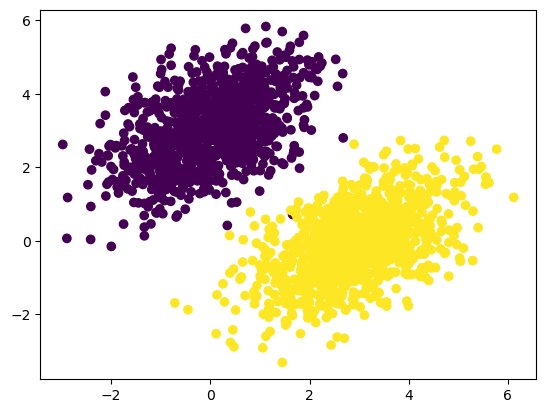

In [88]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])#scatter(x軸資料，y軸資料，c:點顏色):畫成圖
plt.show()#顯示

**Creating the linear classifier variables**

In [89]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))#(2,1):一個二維數組，每行有1個元素。
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))#shape:矩陣          (2,):一維數組，數組中有2個元素。

**The forward pass function**

In [90]:
def model(inputs):
    return tf.matmul(inputs, W) + b#tf.matmul:產生出A*B的矩陣

**The mean squared error loss function**

In [91]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)#reduce_mean:計算張量tensor沿著指定的數軸上的的平均值

**The training step function**

In [92]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])#計算梯度
    W.assign_sub(grad_loss_wrt_W * learning_rate)#grad_loss_wrt_W =grad_loss_wrt_W * learning_rate
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [93]:
for step in range(40):#讓step從0跑到39
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")#{}是小事他代表的數字，.4f:float且小數點下四位

Loss at step 0: 2.6174
Loss at step 1: 0.3308
Loss at step 2: 0.1416
Loss at step 3: 0.1140
Loss at step 4: 0.1042
Loss at step 5: 0.0969
Loss at step 6: 0.0904
Loss at step 7: 0.0846
Loss at step 8: 0.0792
Loss at step 9: 0.0744
Loss at step 10: 0.0699
Loss at step 11: 0.0659
Loss at step 12: 0.0622
Loss at step 13: 0.0589
Loss at step 14: 0.0558
Loss at step 15: 0.0530
Loss at step 16: 0.0505
Loss at step 17: 0.0482
Loss at step 18: 0.0461
Loss at step 19: 0.0441
Loss at step 20: 0.0424
Loss at step 21: 0.0408
Loss at step 22: 0.0394
Loss at step 23: 0.0380
Loss at step 24: 0.0368
Loss at step 25: 0.0357
Loss at step 26: 0.0347
Loss at step 27: 0.0338
Loss at step 28: 0.0330
Loss at step 29: 0.0322
Loss at step 30: 0.0315
Loss at step 31: 0.0309
Loss at step 32: 0.0303
Loss at step 33: 0.0298
Loss at step 34: 0.0294
Loss at step 35: 0.0289
Loss at step 36: 0.0285
Loss at step 37: 0.0282
Loss at step 38: 0.0278
Loss at step 39: 0.0275


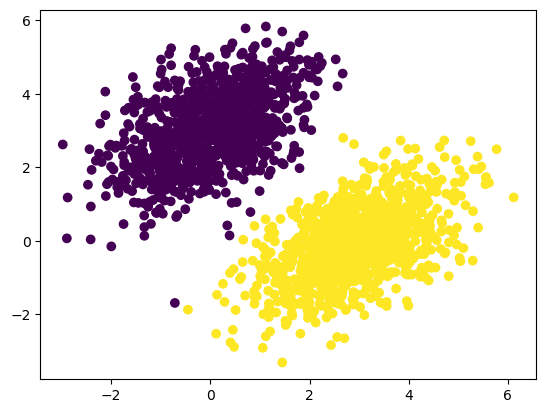

In [94]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)#scatter(x軸資料，y軸資料，c:點顏色):畫成圖
plt.show()

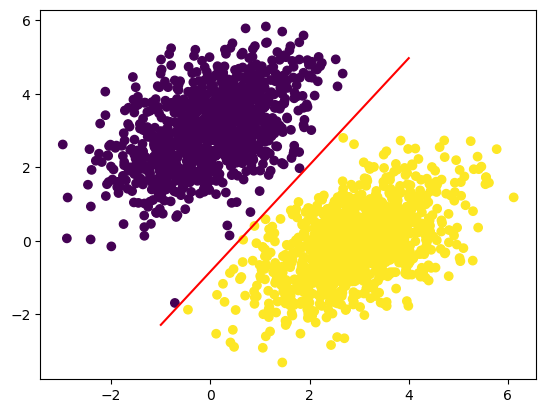

In [95]:
x = np.linspace(-1, 4, 100)#np.linspace(起始點, 結束點, 生成樣本數量)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "r")#plt.plot(x, y, 顏色和形狀)畫線
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [96]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):#class subclass_name(子類別)(superclass_name(父類別)):

    def __init__(self, units, activation=None):#__init__()：定義自定義圖層屬性
        super().__init__()#會去呼叫父類別的initializer__init__
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]#input_dim：代表數據的維度
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")#add_weight():添加權重
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b#tf.matmul(a, b)=a*b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [108]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)#因為shape=(2, 784)+units=32

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [98]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")#全連接層 相當於添加一個層

In [99]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([#models.Sequential():搭建神經網絡
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])
#Sequential model:一層層順序執行的簡單模型，只有第一層要寫input的規格，其他層的input就是上一層的output

In [100]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [101]:
model = keras.Sequential([keras.layers.Dense(1)])
#model.compile:方法用於在配置訓練方法時，告知訓練時用的優化器、損失函數和準確率評測標準
model.compile(optimizer="rmsprop",#優化器
              loss="mean_squared_error",#損失函數
              metrics=["accuracy"])#準確率

In [102]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [103]:
history = model.fit(# 進行訓練, 訓練過程會存在 train_history 變數中
    inputs,
    targets,
    epochs=5,#迭代次數
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 3ms/step - loss: 3.1712 - binary_accuracy: 0.3770
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 2.9583 - binary_accuracy: 0.3705
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 2.7844 - binary_accuracy: 0.3635
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 2.6247 - binary_accuracy: 0.3540
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 2.4733 - binary_accuracy: 0.3465


In [104]:
history.history#一個紀錄了連續迭代的訓練/驗證(如果有)損失值和評估值

{'loss': [3.1711838245391846,
  2.9583349227905273,
  2.7844057083129883,
  2.624746799468994,
  2.473306179046631],
 'binary_accuracy': [0.37700000405311584,
  0.37049999833106995,
  0.3634999990463257,
  0.3540000021457672,
  0.3465000092983246]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [105]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))#隨機排列一個序列，或返回一個排列後的範圍。如果給的是烈，會打亂順序。給的是數字，會自動產生陣列。
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 7ms/step - loss: 0.4857 - binary_accuracy: 0.8714 - val_loss: 0.3284 - val_binary_accuracy: 0.6883
Epoch 2/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0697 - binary_accuracy: 0.9593 - val_loss: 0.1142 - val_binary_accuracy: 0.9717
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0718 - binary_accuracy: 0.9643 - val_loss: 0.0261 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0643 - binary_accuracy: 0.9636 - val_loss: 0.0412 - val_binary_accuracy: 0.9967
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0708 - binary_accuracy: 0.9600 - val_loss: 0.0367 - val_binary_accuracy: 0.9983


### Inference: Using a model after training

In [106]:
predictions = model.predict(val_inputs, batch_size=128)#樣本屬於每一個類別的概率
print(predictions[:10])

[[ 1.268632  ]
 [-0.13429365]
 [-0.10636261]
 [-0.2816749 ]
 [ 1.0692607 ]
 [ 0.45168358]
 [ 0.96629274]
 [-0.29008695]
 [ 0.04381466]
 [ 0.15701547]]


## Summary